In [2]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [45]:
panda_img = mpimg.imread("panda.jpeg")
print(panda_img.shape)

wm_img = mpimg.imread("wm.jpeg")
print(wm_img.shape)

# downsample image
panda_img_ds = panda_img[::8,::14,::1]
print(panda_img_ds.shape)

wm_img_ds = wm_img[::11,::19,::1]
print(wm_img_ds.shape)

# reshape to 2-d
panda_fimg = panda_img_ds.reshape(-1, 3)
print(panda_fimg.shape)

wm_fimg = wm_img_ds.reshape(-1, 3)
print(wm_fimg.shape)

(788, 1400, 3)
(1080, 1920, 3)
(99, 100, 3)
(99, 102, 3)
(9900, 3)
(10098, 3)


In [47]:
panda_kmeans, wm_kmeans = [], []
for i in range(2, 6):
   panda_kmeans.append(KMeans(n_clusters=i, random_state=0).fit(panda_fimg))
   wm_kmeans.append(KMeans(n_clusters=i, random_state=0).fit(wm_fimg))

In [48]:
panda_fimgs = [np.array([i for i in panda_fimg]) for _ in range(4)]
for n, kmeans in enumerate(panda_kmeans):
   for i, cluster in enumerate(kmeans.labels_):
      panda_fimgs[n][i] = kmeans.cluster_centers_[cluster]

wm_fimgs = [np.array([i for i in wm_fimg]) for _ in range(4)]
for n, kmeans in enumerate(wm_kmeans):
   for i, cluster in enumerate(kmeans.labels_):
      wm_fimgs[n][i] = kmeans.cluster_centers_[cluster]

<Figure size 720x720 with 0 Axes>

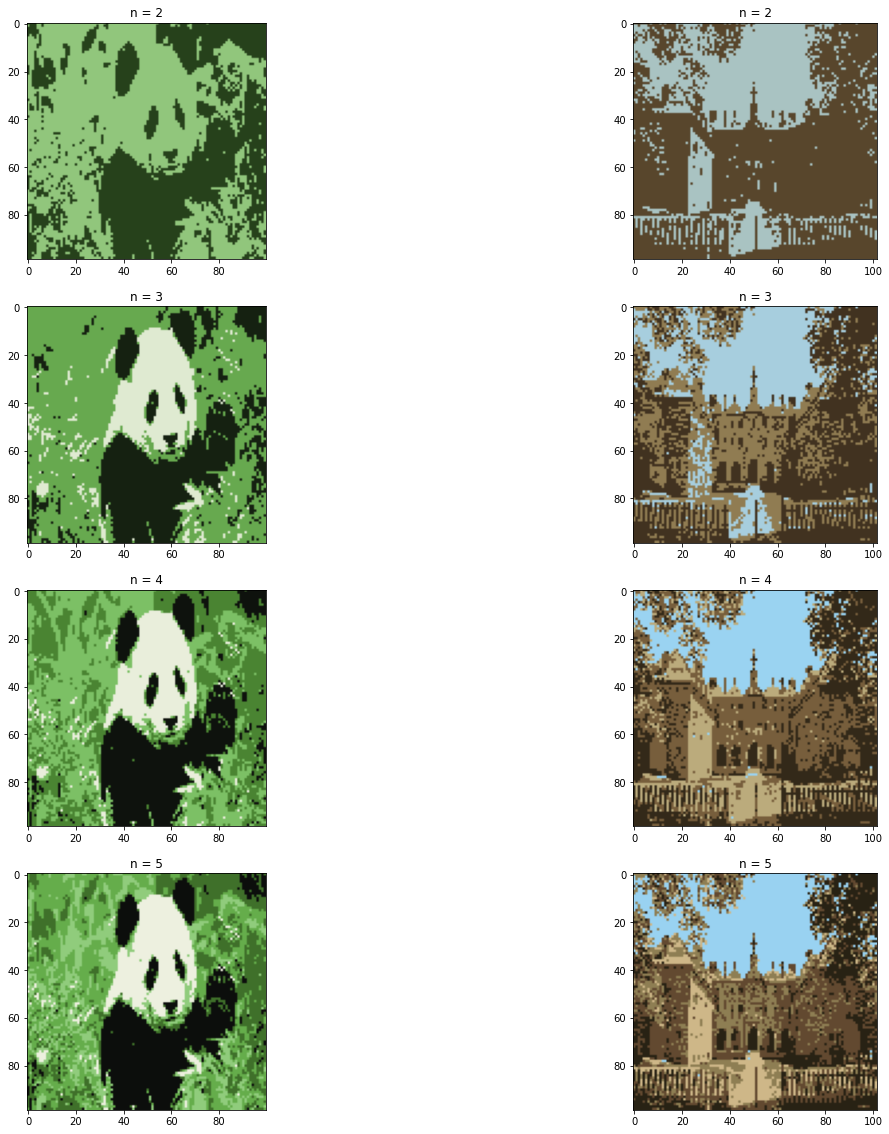

In [49]:
plt.figure(figsize=(10, 10))

#subplot(r,c) provide the no. of rows and columns
f, sub_arr = plt.subplots(4, 2, figsize=(20, 20))

for i in range(len(panda_fimgs)):
   pimg = panda_fimgs[i].reshape(99, 100, 3).astype(np.uint8)
   sub_arr[i, 0].imshow(pimg)
   sub_arr[i, 0].set_title(f'n = {i+2}')

   pimg = wm_fimgs[i].reshape(99, 102, 3).astype(np.uint8)
   sub_arr[i, 1].imshow(pimg)
   sub_arr[i, 1].set_title(f'n = {i+2}')